In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

same direction vehicle:591
opposite direction vehicle:169
0.03413769180846563


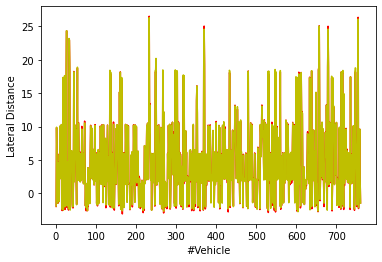

In [74]:
import numpy as np

#label_path = 'evaluation(_855)완성.txt'
#label_path = 'evaluation(_3000).txt'
label_path = 'evaluation_완성본.txt'
vehicleList = []
estimationList = []
answerList = []
allList = []
same = 0
opposite= 0
with open(label_path, encoding='utf-8') as f:
    lines = f.readlines()
    del lines[:1] # exclude the title of elements
    for ii, line in enumerate(lines):
        label = line.strip().split(' ')
        allList.append(label)
        vehicleList.append(ii+1)
        a = float(label[-2])
        estimationList.append(float(label[-2]))
        answerList.append(float(label[-1]))
        
        if label[1]=='same':
            same+=1
        else:
            opposite +=1
print(f"same direction vehicle:{same}")
print(f"opposite direction vehicle:{opposite}")
            

            
#print(vehicleList)
#print(estimationList)
#print(answerList)


for ii, a in enumerate(estimationList):
    if estimationList[ii]-answerList[ii] < -1:
        print(ii)
        print(estimationList[ii])

estimationArray = np.array(estimationList)
answerArray = np.array(answerList)
newArray = answerArray - estimationArray
newList = list(newArray)
print(np.mean(newArray))

plt.plot(vehicleList, estimationList, 'r',
        vehicleList, answerList, 'y')
#plt.plot(newList)

plt.xlabel('#Vehicle')
plt.ylabel("Lateral Distance")

plt.show()

In [75]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

absolute_error = mae(answerArray, estimationArray)
square_error = mse(answerArray, estimationArray)

print("Mean absolute error: " + str(absolute_error))
print("Mean squared error: " + str(square_error))
print("Root mean squared error: " + str(sqrt(square_error)))

Mean absolute error: 0.14986958640729175
Mean squared error: 0.04166690419545671
Root mean squared error: 0.20412472705543713


In [76]:
# Standard Error
from scipy.stats import sem

print("Standard Deviation of sample is % s "% (sem(answerArray - estimationArray)))

Standard Deviation of sample is 0.007304908577075378 


In [77]:
# Sort
def myFunc(e):
    return float(e[2])
allList.sort(key=myFunc)

# 0<=aGroup<20 / 20<=bGroup<40 / 40<=cGroup
aGroup = []
aVehicle = []
a_estimationList = []
a_answerList = []

bGroup = []
bVehicle = []
b_estimationList = []
b_answerList = []

cGroup = []
cVehicle = []
c_estimationList = []
c_answerList = []

for i in allList:
    if float(i[2])>= 0 and float(i[2])<20:
        aGroup.append(i)
    elif float(i[2])>= 20 and float(i[2])<40:
        bGroup.append(i)
    else:
        cGroup.append(i)

        
for ii, a in enumerate(aGroup):
    aVehicle.append(ii+1)
    a_estimationList.append(float(a[-2]))
    a_answerList.append(float(a[-1]))
    
for ii, a in enumerate(bGroup):
    bVehicle.append(ii+1)
    b_estimationList.append(float(a[-2]))
    b_answerList.append(float(a[-1]))
    
for ii, a in enumerate(cGroup):
    cVehicle.append(ii+1)
    c_estimationList.append(float(a[-2]))
    c_answerList.append(float(a[-1]))
    
a_estimationArray = np.array(a_estimationList)
a_answerArray = np.array(a_answerList)
anewArray = a_answerArray-a_estimationArray
anewList = list(anewArray)

b_estimationArray = np.array(b_estimationList)
b_answerArray = np.array(b_answerList)
bnewArray = b_answerArray-b_estimationArray
bnewList = list(bnewArray)

c_estimationArray = np.array(c_estimationList)
c_answerArray = np.array(c_answerList)
cnewArray = c_answerArray-c_estimationArray
cnewList = list(cnewArray)

In [78]:
print(len(aVehicle))
print(len(bVehicle))
print(len(cVehicle))

318
386
56


In [79]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

a_absolute_error = mae(a_answerArray, a_estimationArray)
a_square_error = mse(a_answerArray, a_estimationArray)

print("A Group's Mean absolute error: " + str(a_absolute_error))
print("A Group's Mean squared error: " + str(a_square_error))

# Standard Error
from scipy.stats import sem

print("A Group's Standard Deviation of sample is % s "% (sem(a_answerArray - a_estimationArray)))

# ---------- B Group

b_absolute_error = mae(b_answerArray, b_estimationArray)
b_square_error = mse(b_answerArray, b_estimationArray)

print("B Group's Mean absolute error: " + str(b_absolute_error))
print("B Group's Mean squared error: " + str(b_square_error))

print("B Group's Standard Deviation of sample is % s "% (sem(b_answerArray - b_estimationArray)))

# ---------- C Group

c_absolute_error = mae(c_answerArray, c_estimationArray)
c_square_error = mse(c_answerArray, c_estimationArray)

print("C Group's Mean absolute error: " + str(c_absolute_error))
print("C Group's Mean squared error: " + str(c_square_error))

print("C Group's Standard Deviation of sample is % s "% (sem(c_answerArray - c_estimationArray)))

A Group's Mean absolute error: 0.10159788021001592
A Group's Mean squared error: 0.019271772041842394
A Group's Standard Deviation of sample is 0.007738163949235564 
B Group's Mean absolute error: 0.17496410657442152
B Group's Mean squared error: 0.04991869446053196
B Group's Standard Deviation of sample is 0.011061304919537183 
C Group's Mean absolute error: 0.2510109754469636
C Group's Mean squared error: 0.11196085031206936
C Group's Standard Deviation of sample is 0.045117996222623566 


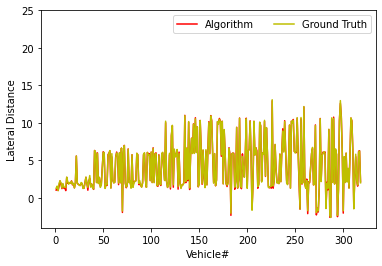

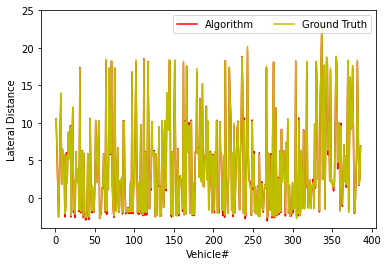

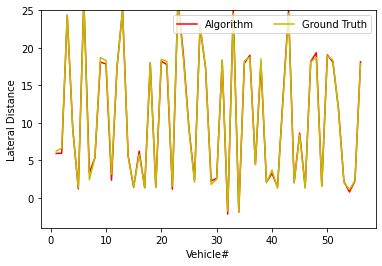

In [80]:
fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-4, 25)


plt.plot(aVehicle, a_estimationList, label = 'Algorithm', color='r')
plt.plot(aVehicle, a_answerList, label = 'Ground Truth', color='y', )
plt.legend(loc='upper right', ncol=2)

#plt.plot(aVehicle, a_estimationList, 'r',
#        aVehicle, a_answerList, 'y')

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance")

plt.show()


fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-4, 25)

plt.plot(bVehicle, b_estimationList, label = 'Algorithm', color='r')
plt.plot(bVehicle, b_answerList, label = 'Ground Truth', color='y', )
plt.legend(loc='upper right', ncol=2)

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance")

plt.show()

fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-4, 25)
plt.plot(cVehicle, c_estimationList, label = 'Algorithm', color='r')
plt.plot(cVehicle, c_answerList, label = 'Ground Truth', color='y', )
plt.legend(loc='upper right', ncol=2)

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance")

plt.show()

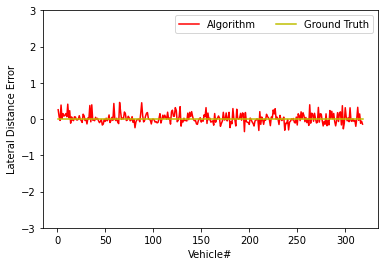

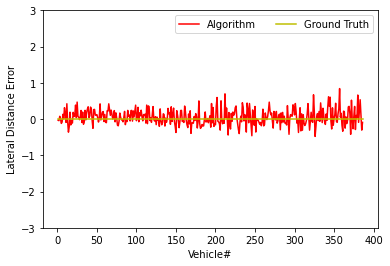

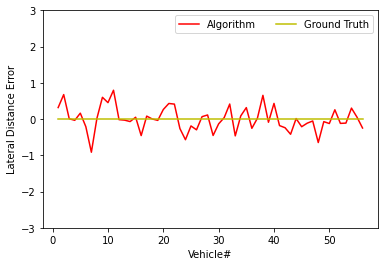

In [81]:
# Error Graph Plotting

fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)

plt.plot(aVehicle, anewList, label = 'Algorithm', color='r')
plt.plot(aVehicle, [0]*len(aVehicle), label = 'Ground Truth', color='y', )
plt.legend(loc='best', ncol=2)

#plt.plot(aVehicle, a_estimationList, 'r',
#        aVehicle, a_answerList, 'y')

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance Error")

plt.show()


fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)

plt.plot(bVehicle, bnewList, label = 'Algorithm', color='r')
plt.plot(bVehicle, [0]*len(bVehicle), label = 'Ground Truth', color='y', )
plt.legend(loc='best', ncol=2)

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance Error")

plt.show()

fig, ax = plt.subplots()
#ax.set_xlim(-10, 10)
ax.set_ylim(-3, 3)
plt.plot(cVehicle, cnewList, label = 'Algorithm', color='r')
plt.plot(cVehicle, [0]*len(cVehicle), label = 'Ground Truth', color='y', )
plt.legend(loc='best', ncol=2)

plt.xlabel('Vehicle#')
plt.ylabel("Lateral Distance Error")

plt.show()